In [1]:
!pip install fbprophet
!pip install alpha_vantage
!pip install wordcloud
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import xgboost as xgb
import tensorflow as tf
import keras
from dateutil.easter import easter
import pickle
from datetime import datetime
from fbprophet import Prophet
import wordcloud
from alpha_vantage.alphavantage import AlphaVantage
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from matplotlib.pyplot import figure
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

Using TensorFlow backend.


In [2]:
# API key
key = config.ALPHAVANTAGE_API_KEY

In [3]:
# create timeseries object
ts = TimeSeries(key, output_format='pandas')

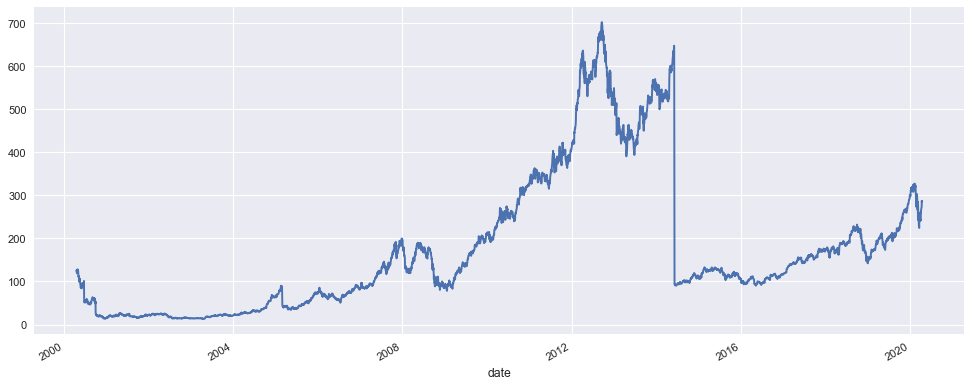

In [4]:
aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['4. close'].plot()

In [5]:
# technical indicators
ti = TechIndicators(key, output_format='pandas')

<Figure size 1200x480 with 0 Axes>

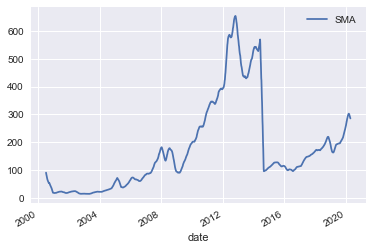

In [6]:
# simple moving average visual
aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL', interval='daily', time_period=60, series_type='close')
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_sma.plot()

<Figure size 1200x480 with 0 Axes>

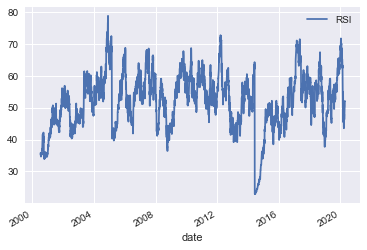

In [7]:
# relative strength index visual
aapl_rsi, meta_data_rsi = ti.get_rsi(symbol='AAPL', interval='daily', time_period=60, series_type='close')
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_rsi.plot()

In [8]:
# covnvert the dataframe into the prophet expected format
aapl_data['date'] = aapl_data.index
aapl_data.rename(columns={'4. close': 'y', 'date':'ds'}, inplace=True)
aapl_data['ds'] = pd.to_datetime(aapl_data['ds'])
aapl_data['y']=aapl_data['y'].astype(float)
aapl_data

1. open   2. high    3. low       y   5. volume         ds
date                                                                  
2020-04-16   287.38  288.1975  282.3502  286.69  38297396.0 2020-04-16
2020-04-15   282.40  286.3300  280.6300  284.43  32788641.0 2020-04-15
2020-04-14   280.00  288.2500  278.0500  287.05  48748672.0 2020-04-14
2020-04-13   268.31  273.7000  265.8300  273.25  32755731.0 2020-04-13
2020-04-09   268.70  270.0700  264.7000  267.99  40529123.0 2020-04-09
...             ...       ...       ...     ...         ...        ...
2000-04-24   115.00  120.5000  114.7500  120.50   3960900.0 2000-04-24
2000-04-20   123.69  124.7500  117.0600  118.87   6447500.0 2000-04-20
2000-04-19   126.19  130.2500  119.7500  121.12   4644200.0 2000-04-19
2000-04-18   123.50  126.8700  119.3700  126.87   3490400.0 2000-04-18
2000-04-17   109.50  123.9400  109.0600  123.87   3656800.0 2000-04-17

[5031 rows x 6 columns]

In [9]:
#Fit the model - df-Apple
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(aapl_data)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [10]:
# forecast the next 1 year
fcast_time=365   # 1 year
df_forecast = df_prophet.make_future_dataframe(periods= fcast_time, freq='D')
df_forecast.tail(10)

ds
5386 2021-04-07
5387 2021-04-08
5388 2021-04-09
5389 2021-04-10
5390 2021-04-11
5391 2021-04-12
5392 2021-04-13
5393 2021-04-14
5394 2021-04-15
5395 2021-04-16

In [11]:
# Forecasting - call the method predict
df_forecast = df_prophet.predict(df_forecast)

In [12]:
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
5391 2021-04-12  300.703568  195.335127  409.915795
5392 2021-04-13  301.177059  193.223721  414.031655
5393 2021-04-14  301.298444  197.338642  415.494626
5394 2021-04-15  301.905819  198.489633  423.028282
5395 2021-04-16  301.812091  194.081267  417.819759

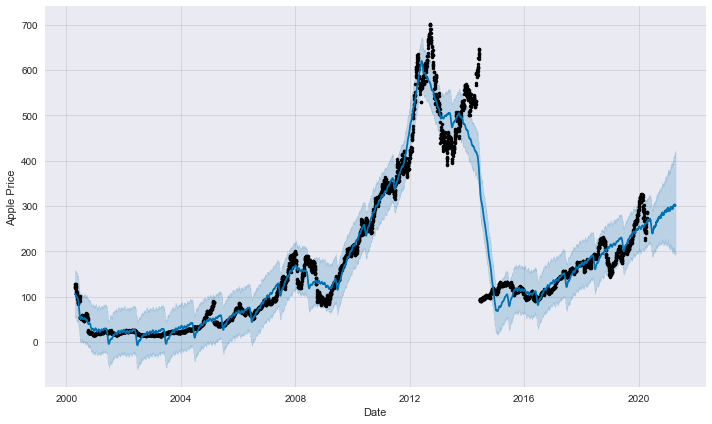

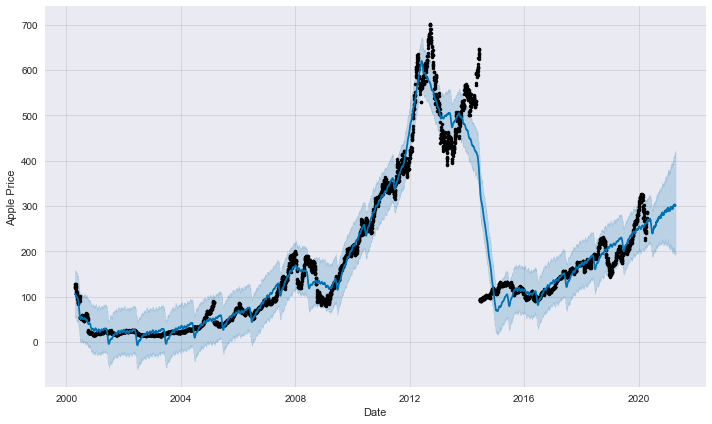

In [13]:
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'Apple Price')

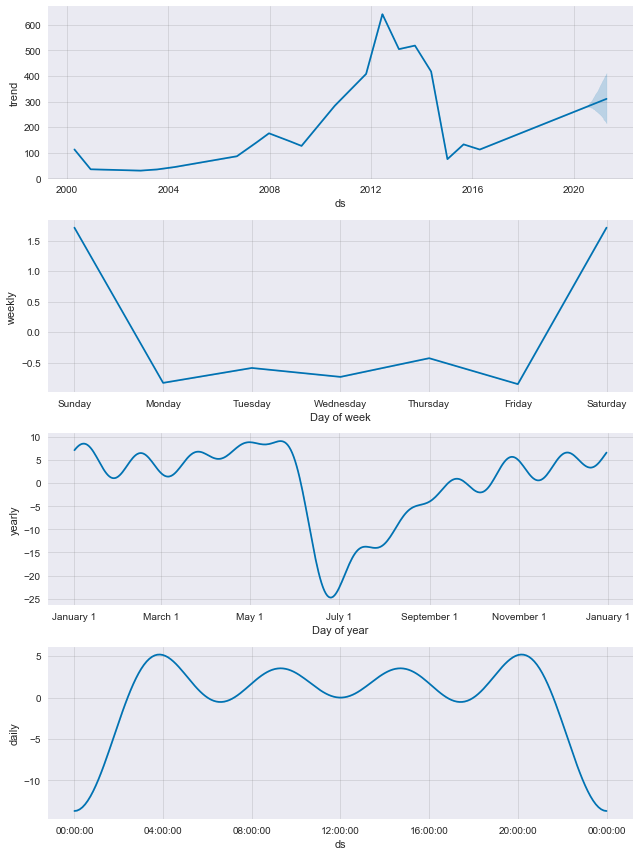

In [14]:
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

In [15]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(df_prophet, df_forecast)  # This returns a plotly Figure
py.iplot(fig)

In [18]:
cc = CryptoCurrencies(key, output_format='pandas')
btc_data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
btc_data.head(100)

1a. open (CNY)  1b. open (USD)  2a. high (CNY)  2b. high (USD)  \
date                                                                         
2020-04-17    50263.624026         7101.99    50520.321324         7138.26   
2020-04-16    46861.234750         6621.25    50886.506000         7190.00   
2020-04-15    48611.617318         6868.57    49067.614200         6933.00   
2020-04-14    48395.544296         6838.04    49386.097200         6978.00   
2020-04-13    48860.883346         6903.79    48860.883346         6903.79   
2020-04-12    48670.147416         6876.84    50794.499800         7177.00   
2020-04-11    48543.320408         6858.92    49147.588820         6944.30   
2020-04-10    51548.525996         7283.54    51634.941050         7295.75   
2020-04-09    52091.504124         7360.26    52174.026608         7371.92   
2020-04-08    50938.312568         7197.32    52514.308000         7420.00   
2020-04-07    51876.634260         7329.90    52795.210006         7459.69   
2020-04-06    47933.673172         6772.78    52055.267836         7355.14   
2020-04-05    48532.633534         6857.41    48802.494796         6895.54   
2020-04-04    47651.921878         6732.97    49473.927734         6990.41   
2020-04-03    48082.864764         6793.86    49881.515200         7048.00   
2020-04-02    47017.716064         6643.36    50943.125200         7198.00   
2020-04-01    45381.279636         6412.14    47276.607356         6679.94   
2020-03-31    45256.080430         6394.45    46167.508002         6523.23   
2020-03-30    41618.650700         5880.50    46703.762600         6599.00   
2020-03-29    44139.266710         6236.65    44346.988400         6266.00   
2020-03-28    45005.965114         6359.11    45012.264000         6360.00   
2020-03-27    47682.354698         6737.27    48427.746466         6842.59   
2020-03-26    47258.772308         6677.42    47984.772000         6780.00   
2020-03-25    47734.869006         6744.69    49244.266104         6957.96   
2020-03-24    45757.160350         6465.25    48359.874200         6833.00   
2020-03-23    41162.512270         5816.05    46710.840000         6600.00   
2020-03-22    43788.156896         6187.04    45351.059138         6407.87   
2020-03-21    43912.223718         6204.57    45698.630252         6456.98   
2020-03-20    43611.292670         6162.05    48834.060000         6900.00   
2020-03-19    38170.258324         5393.26    45295.360000         6400.00   
2020-03-18    37599.678336         5312.64    38473.949558         5436.17   
2020-03-17    35591.253764         5028.86    39102.635000         5525.00   
2020-03-16    37937.199542         5360.33    37973.223508         5365.42   
2020-03-15    36607.709952         5172.48    42039.756000         5940.00   
2020-03-14    39463.936270         5576.05    39920.216248         5640.52   
2020-03-13    33971.590774         4800.01    42145.917000         5955.00   
2020-03-12    56156.196492         7934.58    56379.771558         7966.17   
2020-03-11    55873.029718         7894.57    56477.652000         7980.00   
2020-03-10    56122.861938         7929.87    57673.732600         8149.00   
2020-03-09    56865.210424         8034.76    57888.248594         8179.31   
2020-03-08    62884.468350         8885.25    62895.155224         8886.76   
2020-03-07    64622.960886         9130.89    65027.151200         9188.00   
2020-03-06    64083.309136         9054.64    64899.758000         9170.00   
2020-03-05    61934.256626         8750.99    64824.879108         9159.42   
2020-03-04    61998.519418         8760.07    62622.887646         8848.29   
2020-03-03    63067.985332         8911.18    63127.930910         8919.65   
2020-03-02    60372.345220         8530.30    63454.199050         8965.75   
2020-03-01    60324.997414         8523.61    61927.250000         8750.00   
2020-02-29    61508.267920         8690.80    62210.346000         8790.00   
2020-02-28    62445.669550        

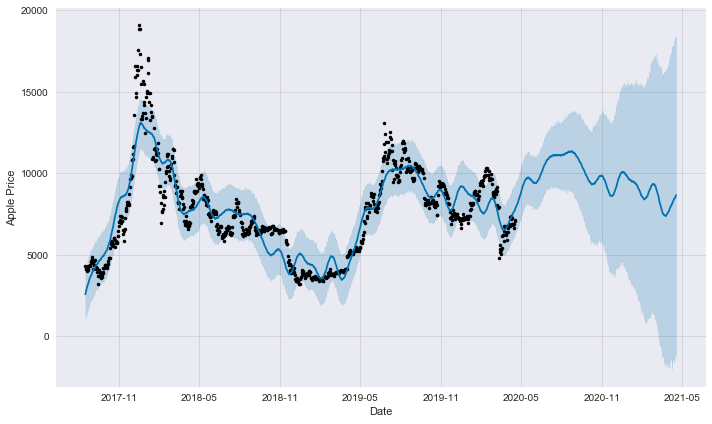

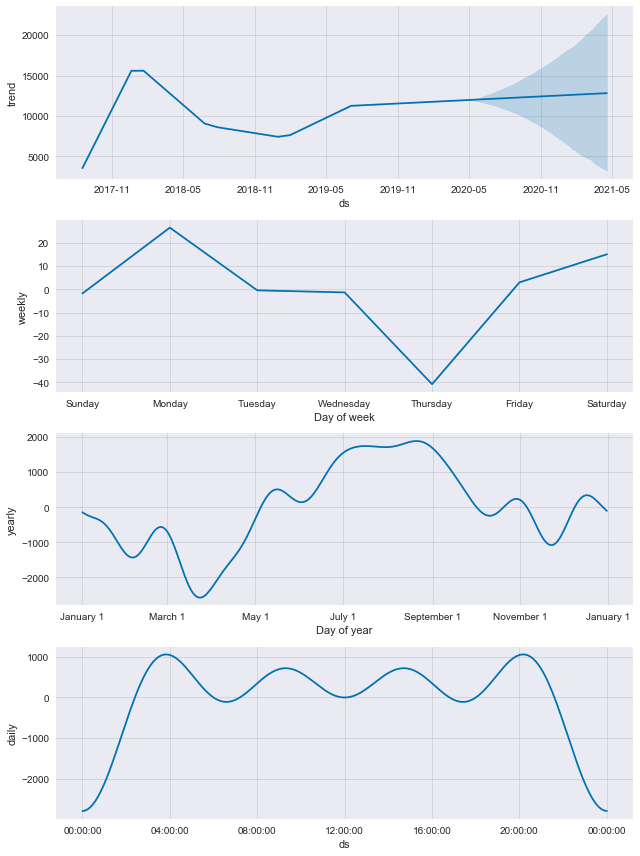

In [19]:
btc_data['date'] = btc_data.index
btc_data.rename(columns={'4b. close (USD)': 'y', 'date': 'ds'},inplace=True)
#convert to float
btc_data['y']=btc_data['y'].astype(float)
btc_data
#call the prophet
df_prophetb = Prophet(daily_seasonality=True)
#fit the model
df_prophetb.fit(btc_data)
# Forecast for 1 year
fcast_time=365   
df_forecastb = df_prophetb.make_future_dataframe(periods= fcast_time, freq='D')
df_forecastb.tail(10)
# Do forecasting
df_forecastb = df_prophetb.predict(df_forecastb)
df_forecastb[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#Do the plot
df_prophetb.plot(df_forecastb, xlabel = 'Date', ylabel = 'Bitcoin Price')
#Do the plot
fig = df_prophetb.plot_components(df_forecastb)
plt.show()

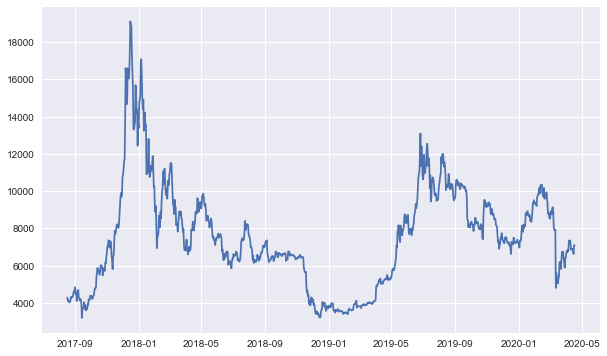

In [21]:
# actual data, plotted
fig = plt.figure(facecolor='w', figsize=(10, 6))
plt.plot(btc_data.ds, btc_data.y)

In [34]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(df_prophetb, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [36]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

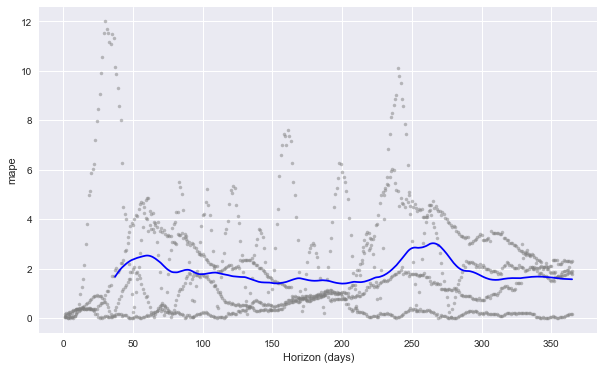

In [37]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')